<a href="https://colab.research.google.com/github/YOUSUBEEN/yousube_en/blob/main/Daily%20study/20230414_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기
- url링크로 데이터 불러오기
- titanic
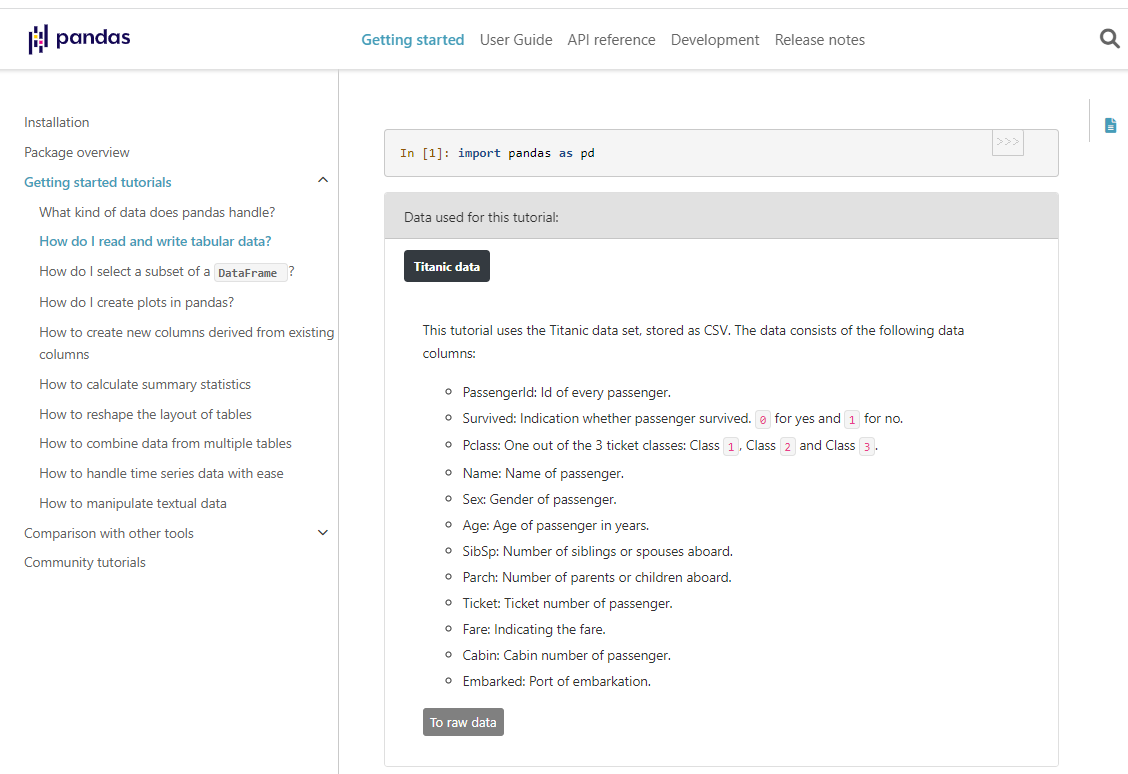

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 단일인덱스

In [ ]:
agg_dict = {'Age':'mean', 'Fare':'median'}
grouped = titanic.groupby('Sex').agg(agg_dict)
grouped

,Age,Fare
Sex,,
female,27.915709,23.0
male,30.726645,10.5


In [ ]:
agg_dict = {'Age':'mean', 'Fare':'median'}
grouped = titanic.groupby('Sex').agg(agg_dict)
result = grouped.reset_index()
result

,Sex,Age,Fare
0,female,27.915709,23.0
1,male,30.726645,10.5


## 멀티인덱스

In [ ]:
agg_dict = {'Age': 'mean', 'Fare' : ['median', 'sum']}
grouped = titanic.groupby('Sex').agg(agg_dict)
grouped

Age   Fare            
             mean median         sum
Sex                                 
female  27.915709   23.0  13966.6628
male    30.726645   10.5  14727.2865

In [ ]:
agg_dict = {'Age': 'mean', 'Fare' : ['median', 'sum']}
grouped = titanic.groupby('Sex').agg(agg_dict)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped.reset_index(inplace=True)
grouped

,Sex,Age_mean,Fare_median,Fare_sum
0,female,27.915709,23.0,13966.6628
1,male,30.726645,10.5,14727.2865


In [ ]:
agg_dict = {'Age': 'mean', 'Fare' : ['median', 'sum']}
grouped = titanic.groupby('Sex').agg(agg_dict)
new_cols = []
for col in grouped.columns:
  if isinstance(col, tuple):
    new_col = f'{col[0]}_{col[1]}'
  else:
    new_col = col
  
  new_cols.append(new_col)

grouped.columns = new_cols
result = grouped.reset_index()
result

,Sex,Age_mean,Fare_median,Fare_sum
0,female,27.915709,23.0,13966.6628
1,male,30.726645,10.5,14727.2865


## 데이터 시각화
- 나이팅게일 : Rose Diagram(로즈 다이어그램= 장미 도표) 참고
- ggplot2 참고 링크 : https://exts.ggplot2.tidyverse.org/
- Seaborn -> ggplot2와 비슷함
- Matplotlib  정형 데이터 & 이미지 데이터 시각화

- 블로그 참고 ! : https://jehyunlee.github.io/2021/04/30/Python-DS-70-pythonvis1/

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

print(mpl.__version__)

3.7.1


# 모두의 데이터분석 교재 기본적인 것만 있음


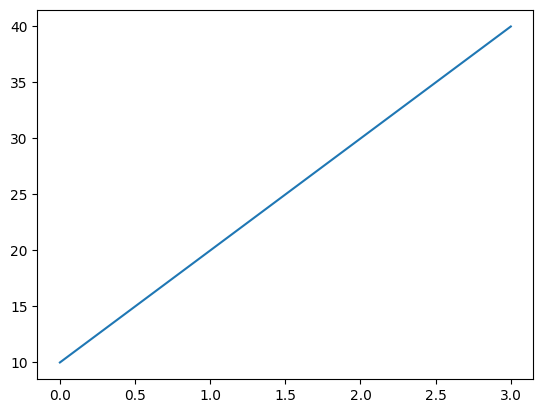

In [ ]:
# 모두의 데이터분석 교재 56p코드
# 이 방식은 세부옵션 불가능

plt.plot([10, 20, 30, 40])
plt.show()

### matplotlib 그릴 때, 객체지향으로 그림!!!!
- chatgpt 사용할 경우, 객체지향으로 해달라고 말함

In [ ]:
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]
temp = [1,2,3,4,5,6,7,8,9,10]

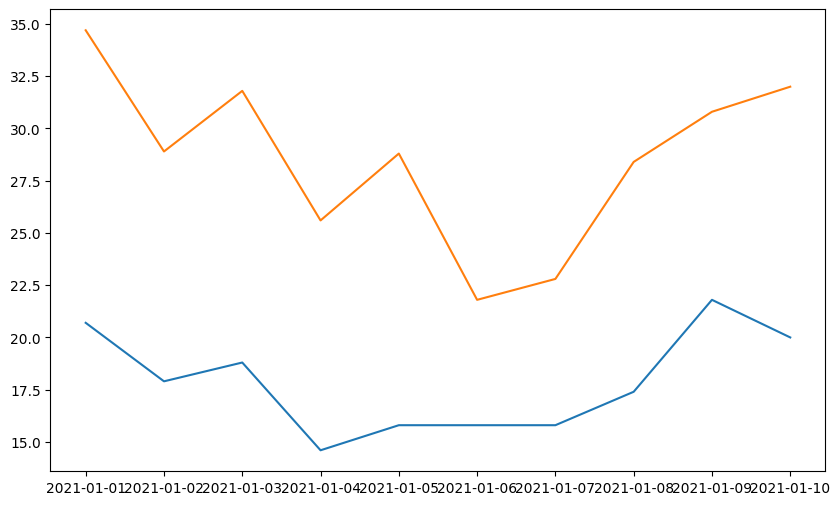

In [ ]:
# 이렇게 시작하는 것이 기본!!!!!

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(dates, min_temperature, label = "Min Temp.")
ax.plot(dates, max_temperature, label = "Max Temp.")
plt.show()

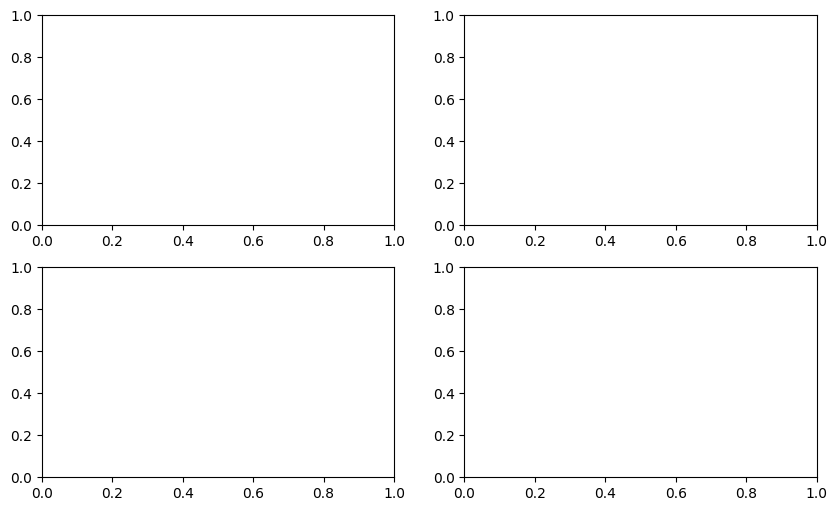

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols= 2, figsize=(10,6))
plt.show()

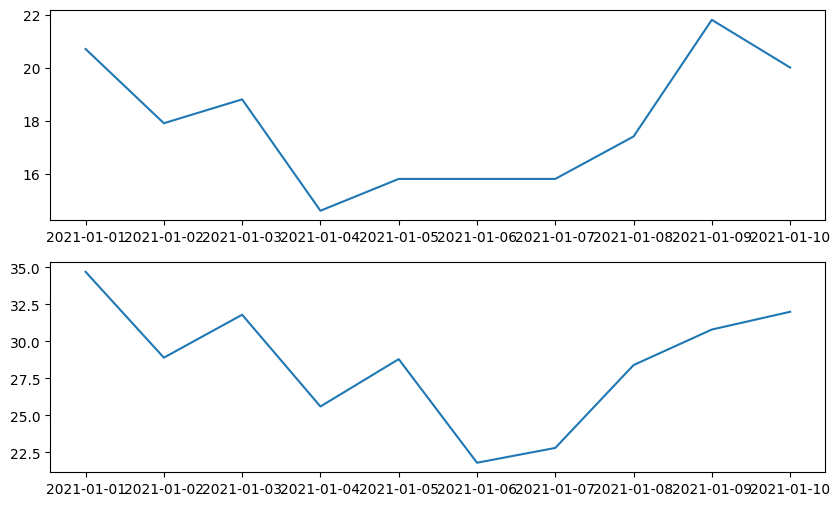

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(10,6))
ax[0].plot(dates, min_temperature, label = "Min Temp.")
ax[1].plot(dates, max_temperature, label = "Max Temp.")
plt.show()

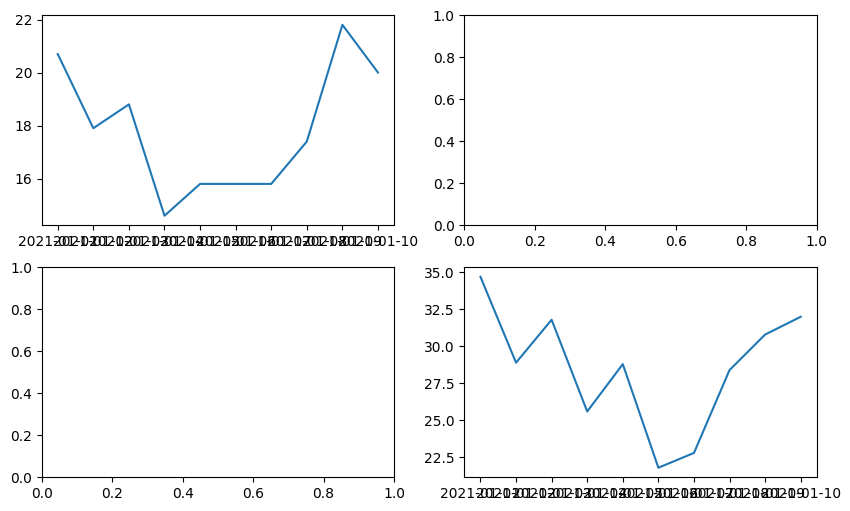

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,6))
ax[0, 0].plot(dates, min_temperature, label = "Min Temp.")
ax[1, 1].plot(dates, max_temperature, label = "Max Temp.")
plt.show()

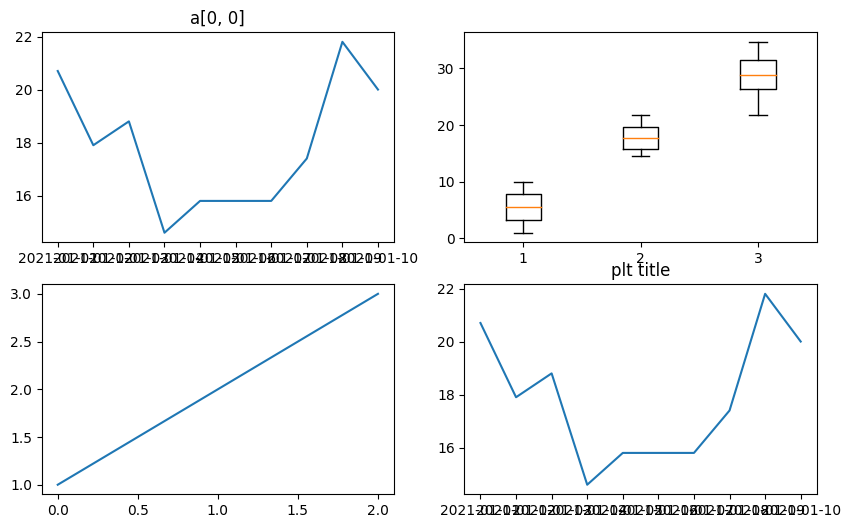

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10,6))
ax[0, 0].plot(dates, min_temperature, label = "Min Temp.")
ax[0, 0].set_title("a[0, 0]")
ax[0, 1].boxplot([temp, min_temperature, max_temperature])
ax[1,0].plot([1,2,3])
ax[1, 1].plot(dates, min_temperature, label = "Max Temp.")
plt.title("plt title")
plt.show()

#선그래프(Line)

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
TSLA = yf.download('TSLA', start = '2019-08-01', end = '2023-04-13')
TSLA['Close']
AAPL = yf.download('AAPL', start = '2019-08-01', end = '2023-04-13')
AAPL['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date
2019-08-01     52.107498
2019-08-02     51.005001
2019-08-05     48.334999
2019-08-06     49.250000
2019-08-07     49.759998
                 ...    
2023-04-05    163.759995
2023-04-06    164.660004
2023-04-10    162.029999
2023-04-11    160.800003
2023-04-12    160.100006
Name: Close, Length: 931, dtype: float64

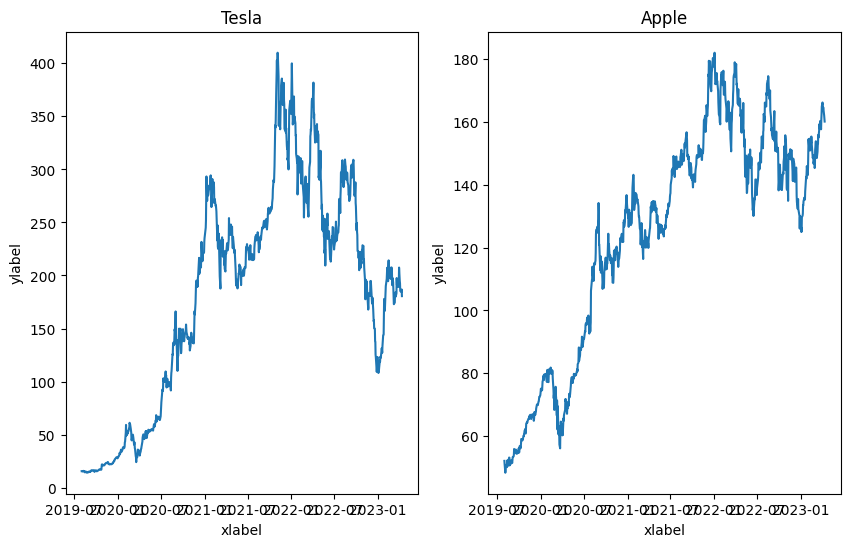

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 6))
ax[0].plot(TSLA['Close'], label = "Tesla")
ax[0].set_title("Tesla")
ax[0].set_xlabel("xlabel")
ax[0].set_ylabel('ylabel')

ax[1].plot(AAPL['Close'], label = "Apple")
ax[1].set_title("Apple")
ax[1].set_xlabel("xlabel")
ax[1].set_ylabel('ylabel')
plt.show()

##다른 데이터불러오기
- https://stockanalysis.com/stocks/

- samsung 




In [ ]:
import yfinance as yf
Samsung = yf.download('005930.KS', start = '2019-08-01', end = '2023-04-13')
Samsung['Close']
Hanon = yf.download('018880.KS', start = '2019-08-01', end = '2023-04-13')
Hanon['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date
2019-08-01    11850.0
2019-08-02    11950.0
2019-08-05    11850.0
2019-08-06    11550.0
2019-08-07    11600.0
               ...   
2023-04-06     8330.0
2023-04-07     8310.0
2023-04-10     8370.0
2023-04-11     8770.0
2023-04-12     9170.0
Name: Close, Length: 912, dtype: float64

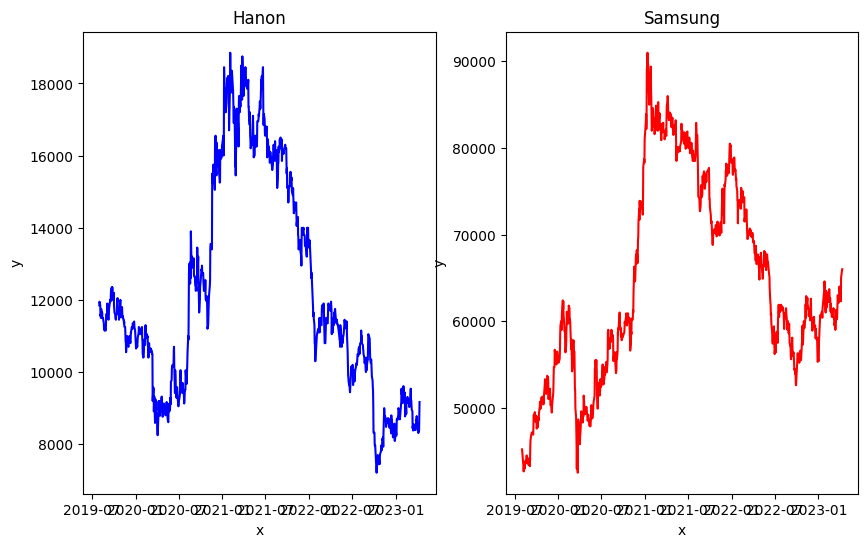

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(10,6))

ax[0].plot(Hanon['Close'], label = 'hanon', color= 'blue')
ax[0].set_title('Hanon')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

ax[1].plot(Samsung['Close'], label = 'samsung', color= 'red')
ax[1].set_title('Samsung')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
plt.show()

# Seaborn 라이브러리


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# import seaborn as sb

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


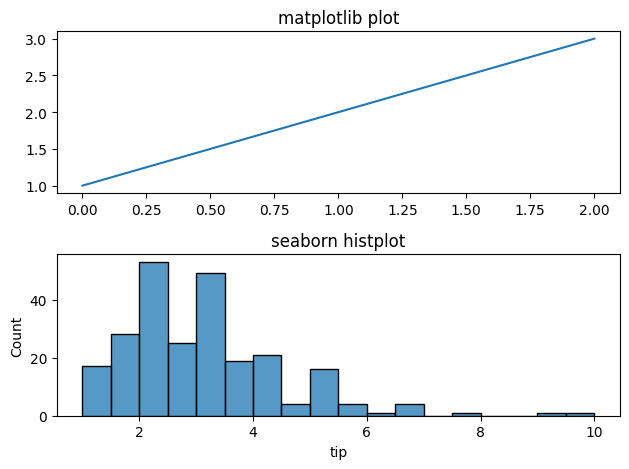

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)
ax[0].plot([1,2,3])
ax[0].set_title("matplotlib plot")

sns.histplot(x = 'tip', data = tips, ax =ax[1])
ax[1].set_title("seaborn histplot")

plt.tight_layout()  # 그래프 사이 간격 일정하게 늘려줌
plt.show()

## 막대그래프

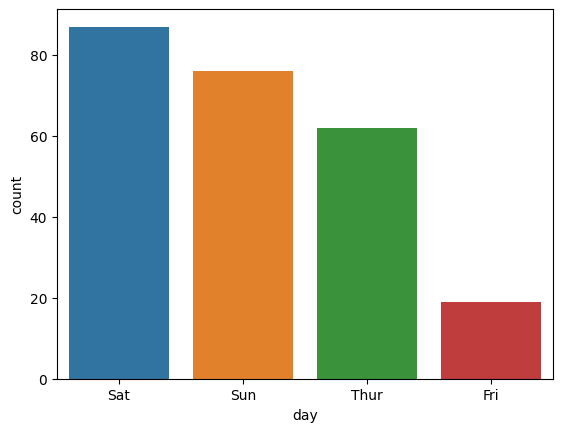

In [ ]:
fig, ax = plt.subplots()
sns.countplot(x= 'day', 
              data = tips, 
              order = tips['day'].value_counts().index)
plt.show()

In [ ]:
tips['day'].value_counts().index

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

그래프 타입 : <class 'matplotlib.axes._axes.Axes'>


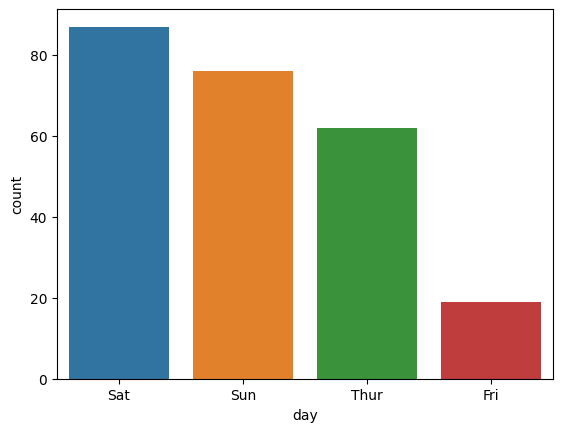

In [ ]:
fig, ax = plt.subplots()
ax = sns.countplot(x= 'day', data = tips, order = tips['day'].value_counts().index)
print('그래프 타입 :' ,type(ax))
plt.show()

- https://matplotlib.org/stable/api/axes_api.html

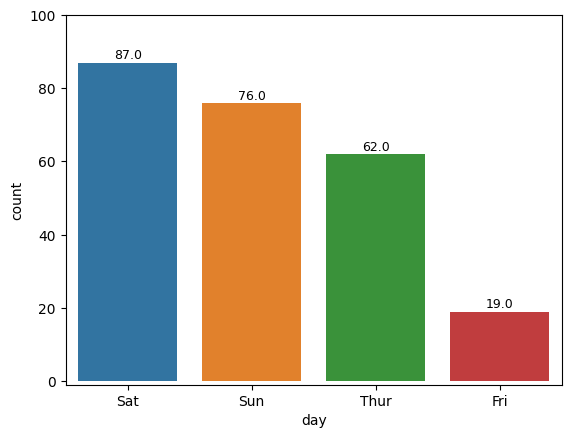

In [ ]:
fig, ax = plt.subplots()
ax = sns.countplot(x= 'day', data = tips, order = tips['day'].value_counts().index)
# print('그래프 타입 :' ,type(ax))

for p in ax.patches:
  # print(p, type(p))
  height = p.get_height()
  ax.text(x = p.get_x() + 0.4,   #r그래프 위에 숫자 좌우
          y = height + 1,        # 그래프 위에 숫자 위아래
          s = height, ha = 'center',
          size = 9)
  
ax.set_ylim(-1, 100)
plt.show()